In [1]:
import os
from os import path
from datetime import datetime
import pandas as pd

In [2]:
from matplotlib import pyplot as plt
from matplotlib import dates as mdates
from matplotlib.ticker import MaxNLocator

plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
import seaborn as sns

In [4]:
filename = path.join('..', 'data', 'raw', 'BOLETIM_DIARIO_CORONAVIRUS_SAP.xlsx')

assert path.exists(filename), f"Caminho para o arquivo não existe:\n{filename}"

In [5]:
frame = pd.read_excel(filename,
                   index_col="DATA",
                   parse_dates=['DATA'],
                   engine='openpyxl')

In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2020-07-03 to 2021-11-15
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   DESCARTADOS          501 non-null    int64
 1   EM INVESTIGACAO      501 non-null    int64
 2   CONFIRMADOS          501 non-null    int64
 3   EXAMINADOS           501 non-null    int64
 4   RECUPERADOS          501 non-null    int64
 5   ATIVOS               501 non-null    int64
 6   HOSPITAL             501 non-null    int64
 7   DOMICILIO            501 non-null    int64
 8   OBITOS               501 non-null    int64
 9   CONFIRMADOS_DIA      501 non-null    int64
 10  RECUPERADOS_DIA      501 non-null    int64
 11  DESCARTADOS_DIA      501 non-null    int64
 12  OBITOS_DIA           501 non-null    int64
 13  ATIVOS_DIA           501 non-null    int64
 14  EM_INVESTIGACAO_DIA  501 non-null    int64
dtypes: int64(15)
memory usage: 62.6 KB


In [7]:
# frame['NOVOS_CASOS'] = frame['CONFIRMADOS'].diff(periods=1)
# frame['RECUPERADOS_DIA'] = frame['RECUPERADOS'].diff(periods=1)
# frame['DESCARTADOS_DIA'] = frame['DESCARTADOS'].diff(periods=1)

frame.head()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,CONFIRMADOS_DIA,RECUPERADOS_DIA,DESCARTADOS_DIA,OBITOS_DIA,ATIVOS_DIA,EM_INVESTIGACAO_DIA
DATA,,,,,,,,,,,,,,,
2020-07-03,690,263,105,1058,63,38,3,35,4,0,0,0,0,0,0
2020-07-04,709,251,109,1069,65,43,3,40,4,4,2,19,0,5,-12
2020-07-05,711,252,110,1073,71,35,3,32,4,1,6,2,0,-8,1
2020-07-06,722,293,121,1136,79,38,2,36,4,11,8,11,0,3,41
2020-07-07,794,264,126,1184,85,37,4,33,4,5,6,72,0,-1,-29


In [8]:
frame.tail()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,CONFIRMADOS_DIA,RECUPERADOS_DIA,DESCARTADOS_DIA,OBITOS_DIA,ATIVOS_DIA,EM_INVESTIGACAO_DIA
DATA,,,,,,,,,,,,,,,
2021-11-11,17198,30,7053,24281,6889,10,1,9,154,3,0,27,0,3,7
2021-11-12,17227,24,7054,24305,6889,11,1,10,154,1,0,29,0,1,-6
2021-11-13,17240,27,7057,24324,6889,14,1,13,154,3,0,13,0,3,3
2021-11-14,17240,27,7057,24324,6889,14,1,13,154,0,0,0,0,0,0
2021-11-15,17249,15,7060,24324,6891,15,1,14,154,3,2,9,0,1,-12


In [9]:
frame['2021-03-23':]['CONFIRMADOS_DIA'].sum()

5007

In [10]:
df = frame.resample('W-MON').sum()

In [11]:
df.tail()

,DESCARTADOS,EM INVESTIGACAO,CONFIRMADOS,EXAMINADOS,RECUPERADOS,ATIVOS,HOSPITAL,DOMICILIO,OBITOS,CONFIRMADOS_DIA,RECUPERADOS_DIA,DESCARTADOS_DIA,OBITOS_DIA,ATIVOS_DIA,EM_INVESTIGACAO_DIA
DATA,,,,,,,,,,,,,,,
2021-10-18,116108,189,48873,165170,47561,248,21,227,1064,21,37,117,0,-16,15
2021-10-25,117203,279,49125,166607,47750,307,15,292,1068,35,28,150,1,6,19
2021-11-01,118489,324,49275,168088,47994,210,14,196,1071,19,35,213,0,-16,-24
2021-11-08,119307,206,49318,168831,48163,78,20,58,1077,3,16,114,1,-14,3
2021-11-15,120477,172,49379,170028,48225,76,9,67,1078,12,2,130,0,10,-6


In [12]:
import matplotlib.ticker as plticker



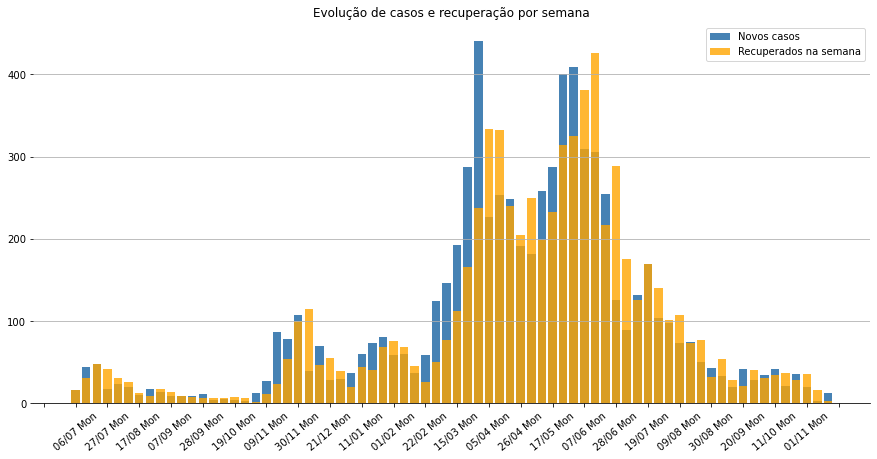

In [13]:
loc = plticker.MultipleLocator(base=3.0)

labels = [date.strftime("%d/%m %a") for date in df.index]

plt.figure(figsize=(15, 7))
ax = plt.subplot()
# plt.bar(labels, df['DESCARTADOS_DIA'], color='green', alpha=0.8, label="Casos descartados na semana")
plt.bar(labels, df['CONFIRMADOS_DIA'], color='steelblue', label='Novos casos')
plt.bar(labels, df['RECUPERADOS_DIA'], color='orange', alpha=0.8, label='Recuperados na semana')
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(loc)
ax.set(title="Evolução de casos e recuperação por semana")
plt.legend()
plt.xticks(rotation=40)
sns.despine(left=True)

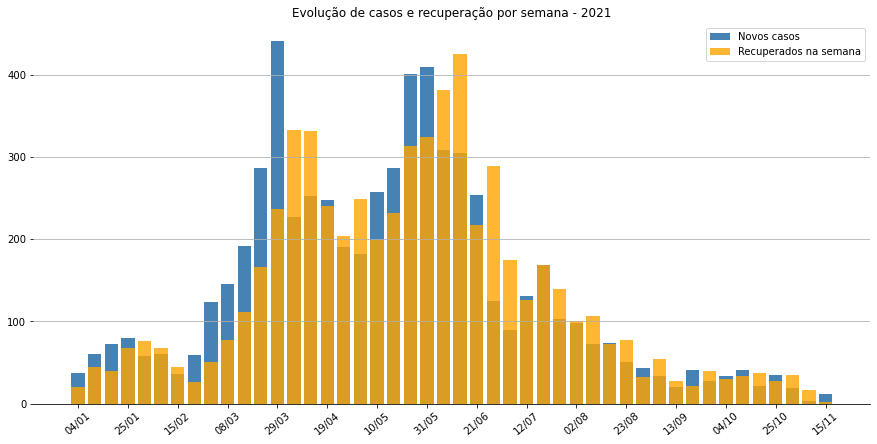

In [14]:
df = df['2021':]

labels = [date.strftime("%d/%m") for date in df.index]

plt.figure(figsize=(15, 7))
ax = plt.subplot()
# plt.bar(labels, df['DESCARTADOS_DIA'], color='green', alpha=0.8, label="Casos descartados na semana")
plt.bar(labels, df['CONFIRMADOS_DIA'], color='steelblue', label='Novos casos')
plt.bar(labels, df['RECUPERADOS_DIA'], color='orange', alpha=0.8, label='Recuperados na semana')
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(loc)
ax.set(title="Evolução de casos e recuperação por semana - 2021")
plt.legend()
plt.xticks(rotation=40)
sns.despine(left=True)

In [15]:
today = datetime.now()

today.strftime("%d/%m/%y %a")

'16/11/21 Tue'

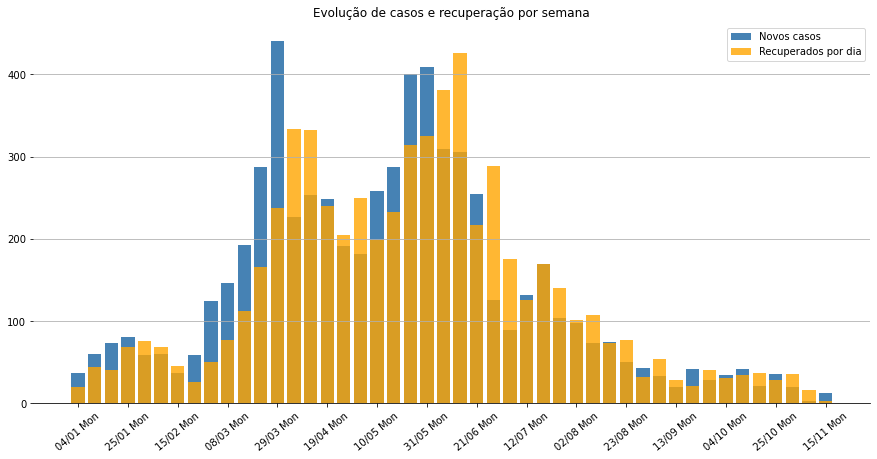

In [16]:
df2 = df['2020-11':]

loc = plticker.MultipleLocator(base=3.0)

labels = [date.strftime("%d/%m %a") for date in df2.index]

plt.figure(figsize=(15, 7))
ax = plt.subplot()
plt.bar(labels, df2['CONFIRMADOS_DIA'], color='steelblue', label='Novos casos')
plt.bar(labels, df2['RECUPERADOS_DIA'], color='orange', alpha=0.8, label='Recuperados por dia')
ax.yaxis.grid(True)
ax.xaxis.set_major_locator(loc)
ax.set(title="Evolução de casos e recuperação por semana")
plt.legend()
plt.xticks(rotation=40)
sns.despine(left=True)

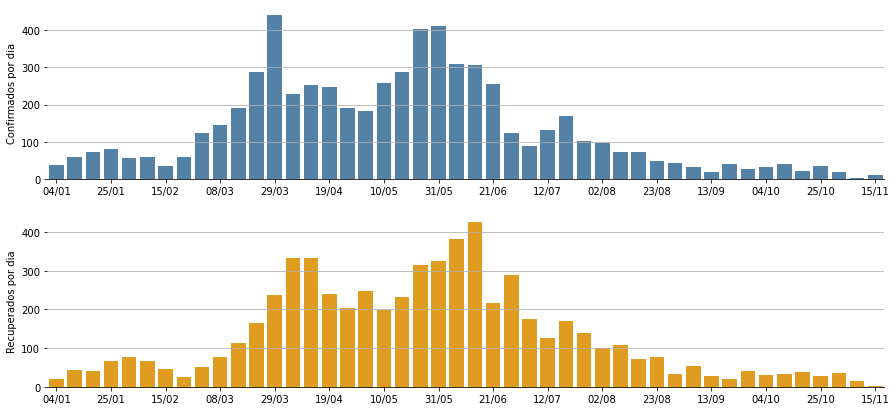

In [22]:
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 7), sharex=False)

loc = plticker.MultipleLocator(base=3.0)

labels = [date.strftime("%d/%m") for date in df2.index]

sns.barplot(x=labels,
            y=df2['CONFIRMADOS_DIA'],
            color='steelblue',            
            ax=ax1)
ax1.xaxis.set_major_locator(loc)
ax1.yaxis.grid(True)
ax1.set_ylabel('Confirmados por dia')

sns.barplot(x=labels,
            y=df2['RECUPERADOS_DIA'],
            color='orange',            
            ax=ax2)
ax2.yaxis.grid(True)
ax2.xaxis.set_major_locator(loc)
ax2.set_ylabel("Recuperados por dia")

sns.despine(left=True)

In [18]:
# import numpy as np

# sns.set_theme(style="white", context="talk")
# rs = np.random.RandomState(8)

# # Set up the matplotlib figure
# f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# # Generate some sequential data
# x = np.array(list("ABCDEFGHIJ"))
# y1 = np.arange(1, 11)
# sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
# ax1.axhline(0, color="k", clip_on=False)
# ax1.set_ylabel("Sequential")

# # Center the data to make it diverging
# y2 = y1 - 5.5
# sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
# ax2.axhline(0, color="k", clip_on=False)
# ax2.set_ylabel("Diverging")

# # Randomly reorder the data to make it qualitative
# y3 = rs.choice(y1, len(y1), replace=False)
# sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
# ax3.axhline(0, color="k", clip_on=False)
# ax3.set_ylabel("Qualitative")

# # Finalize the plot
# sns.despine(bottom=True)
# plt.setp(f.axes, yticks=[])
# plt.tight_layout(h_pad=2)